## Boston House Price Prediction Project
In this project you will work on developing an end to end machine learning project using linear regression, as this will be your first project in your machine learning journey. We will be doing extensive data visualization, we will perform data feature engineering, we will also see how we can select features based on the correlation of the features.

In [3]:
import numpy as np 
import pandas as pd

import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

In [4]:
# from sklearn.datasets import load_boston 
# load_boston = load_boston() 
data=pd.read_csv('C:/Users/Anshul Pant/Downloads/python/ML/Boston_house_prediction/boston_house_prices.csv')
# X = housing.data 
# y = housing.target 
# # print(X,y)
# data = pd.DataFrame(X, columns=housing.feature_names) 
# data["SalePrice"] = y # saleprice 
# data.head() 
data.rename(columns={'MEDV':'SalePrice'},inplace=True)
data.head()



# data = data.head(50)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
compression_opts = dict(method='zip',
                        archive_name='out.csv')  
data.to_csv('out.zip', index=False,
          compression=compression_opts)  

In [6]:
# print(housing.DESCR)

In [7]:
print(data.shape) 

(506, 14)


In [8]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  SalePrice  506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [9]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,SalePrice
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
data.isnull().sum()

CRIM         0
ZN           0
INDUS        0
CHAS         0
NOX          0
RM           0
AGE          0
DIS          0
RAD          0
TAX          0
PTRATIO      0
B            0
LSTAT        0
SalePrice    0
dtype: int64

In [11]:
# sns.pairplot(data, height=2.5)
# plt.tight_layout()

C:\Users\Anshul Pant\AppData\Local\Temp\ipykernel_15980\3036258780.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice']);


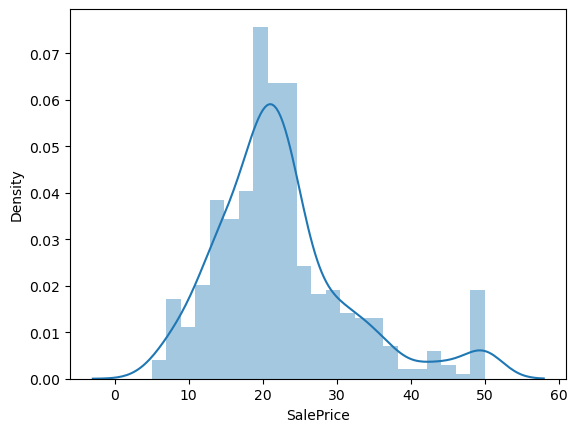

In [12]:
sns.distplot(data['SalePrice']);

In [13]:
print("Skewness: %f" % data['SalePrice'].skew())t
print("Kurtosis: %f" % data['SalePrice'].kurt())

Skewness: 1.108098
Kurtosis: 1.495197


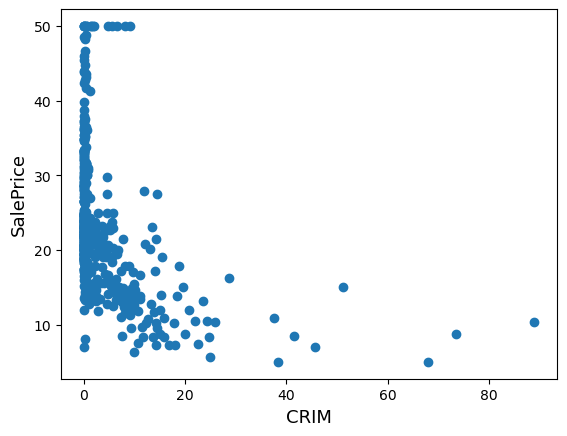

In [14]:
fig, ax = plt.subplots()
ax.scatter(x = data['CRIM'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('CRIM', fontsize=13)
plt.show()

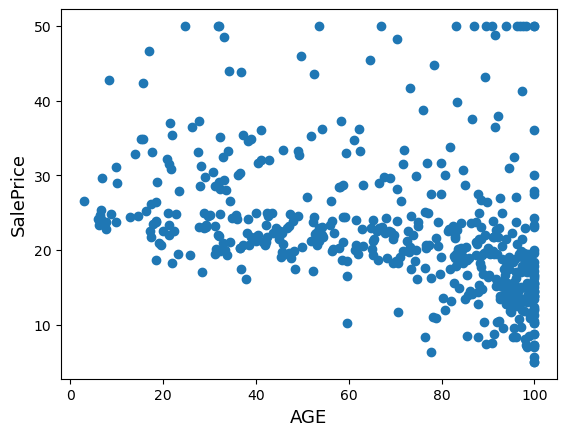

In [15]:
fig, ax = plt.subplots()
ax.scatter(x = data['AGE'], y = data['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('AGE', fontsize=13)
plt.show()

C:\Users\Anshul Pant\AppData\Local\Temp\ipykernel_15980\932968018.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);



 mu = 22.53 and sigma = 9.19



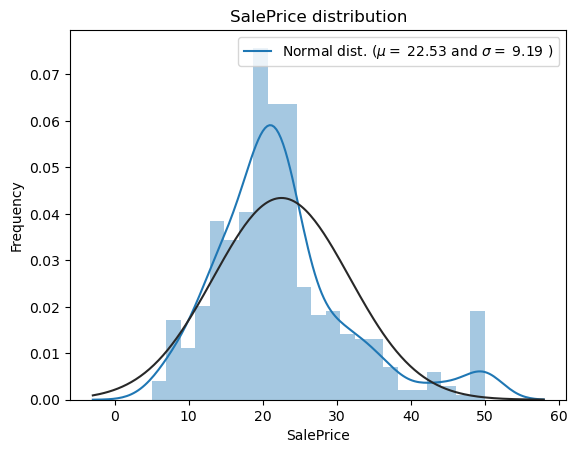

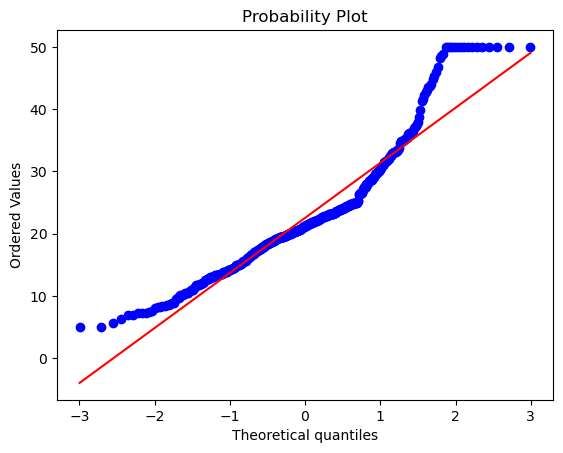

In [16]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()


 mu = 3.09 and sigma = 0.39



C:\Users\Anshul Pant\AppData\Local\Temp\ipykernel_15980\1099305546.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['SalePrice'] , fit=norm);


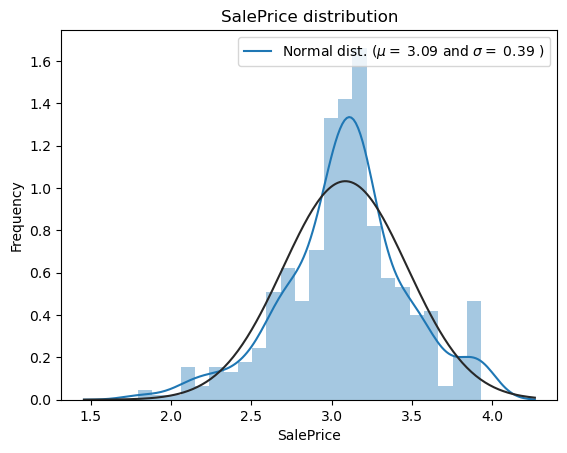

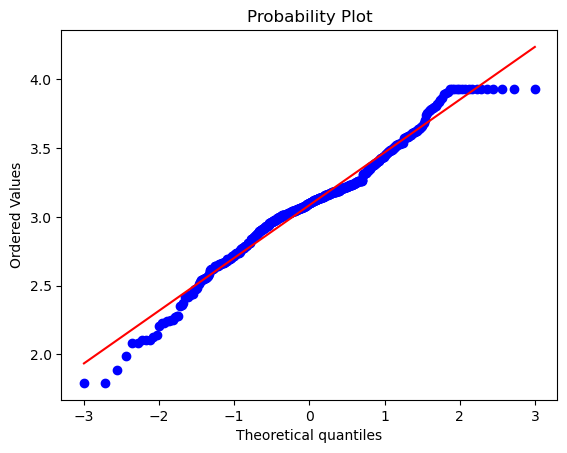

In [17]:
data["SalePrice"] = np.log1p(data["SalePrice"])

sns.distplot(data['SalePrice'] , fit=norm);

(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

### Data Correlation

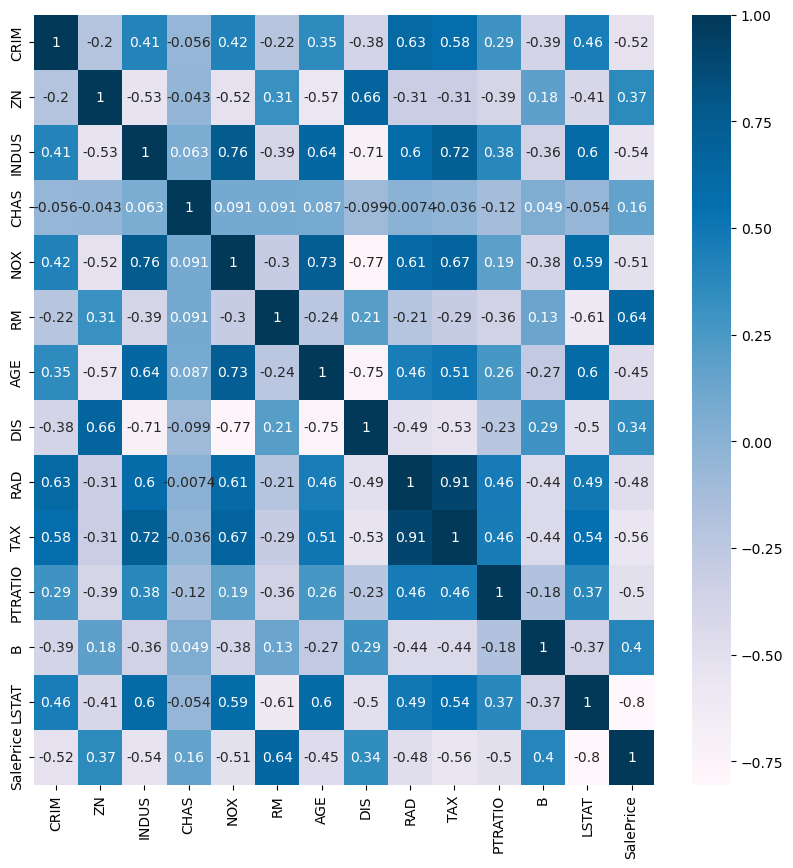

In [18]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [19]:
cor_target = abs(cor["SalePrice"]) # absolute value of the correlation 
# print(cor_target)
relevant_features = cor_target[cor_target>0.2] # highly correlated features 
# print(type(relevant_features))
names = [index for index, value in relevant_features.items()] # getting the names of the features 
# names = [index for index in relevant_features[0]] # getting the names of the features 


names.remove('SalePrice') # removing target feature 

print(names) # printing the features 
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


# Model Building

In [20]:
from sklearn.metrics import mean_squared_error, r2_score


from sklearn.model_selection import cross_val_score
K = 5 

In [21]:
from sklearn.model_selection import train_test_split 

X = data.drop("SalePrice", axis=1) 
y = data["SalePrice"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


### LinearRegression

In [23]:
from sklearn.linear_model import LinearRegression 

LR = LinearRegression() 
LR.fit(X_train, y_train)

predictions = LR.predict(X_test) 

print("Actual value of the house: ", str(y_test.head(1)).split()[1])
print("Model Predicted Value: ", predictions[0])

Actual value of the house:  3.238678
Model Predicted Value:  3.297331870719625


In [24]:
scoreLR=LR.score(X_test,y_test)

mseLR = mean_squared_error(y_test, predictions) 
rmseLR = np.sqrt(mseLR)

r2LR = r2_score(y_test, predictions)

scoresLR = cross_val_score(LR, X_train, y_train, cv=K, scoring='r2')
msecvsLR= scoresLR.mean()

print("Score : ",scoreLR)
print("Root mean square error", rmseLR)

# Evaluate the results
print("Mean MSE:", msecvsLR)

print("R-squared (R2):",r2LR)

Score :  0.7552037752890425
Root mean square error 0.19870124239020792
Mean MSE: 0.7631332050727746
R-squared (R2): 0.7552037752890425


### SVM

In [25]:
from sklearn import svm
from sklearn.svm import SVC

model_SVR = svm.SVR()

model_SVR.fit(X_train,y_train)

predictions = model_SVR.predict(X_test) 

print("Actual value of the house: ", str(y_test.head(1)).split()[1])
print("Model Predicted Value: ", predictions[0])

Actual value of the house:  3.238678
Model Predicted Value:  3.4024642594018495


In [26]:
scoreSVM=model_SVR.score(X_test,y_test)

mseSVM = mean_squared_error(y_test, predictions) 
rmseSVM = np.sqrt(mseSVM)

r2SVM = r2_score(y_test, predictions)

scoresSVM = cross_val_score(model_SVR, X_train, y_train, cv=K, scoring='r2')
msecvsSVM= scoresSVM.mean()

print("Score : ",scoreSVM)
print("Root mean square error", rmseSVM)


# Evaluate the results
print("Mean MSE:", msecvsSVM)

print("R-squared (R2):",r2SVM)

Score :  0.5540773353229891
Root mean square error 0.2681809951336367
Mean MSE: 0.4342880621396297
R-squared (R2): 0.5540773353229891


### RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, y_train)
predictions = model_RFR.predict(X_test)


print("Actual value of the house: ", str(y_test.head(1)).split()[1])
print("Model Predicted Value: ", predictions[0])

Actual value of the house:  3.238678
Model Predicted Value:  3.335620149615635


In [28]:
scoreRF=model_RFR.score(X_test,y_test)

mseRF = mean_squared_error(y_test, predictions) 
rmseRF = np.sqrt(mseRF)

r2RF = r2_score(y_test, predictions)

scoresRF = cross_val_score(model_RFR, X_train, y_train, cv=K, scoring='r2')
msecvsRF= scoresRF.mean()

print("Score : ",scoreRF)
print("Root mean square error", rmseRF)


# Evaluate the results
print("Mean MSE:", msecvsRF)

print("R-squared (R2):",r2RF)

Score :  0.8683118539591408
Root mean square error 0.14573758427798708
Mean MSE: 0.8297242711157826
R-squared (R2): 0.8683118539591408


### CatBoost

In [29]:
from catboost import CatBoostRegressor
cb_model = CatBoostRegressor()
cb_model.fit(X_train, y_train)
predictions = cb_model.predict(X_test) 

print("Actual value of the house: ", str(y_test.head(1)).split()[1])
print("Model Predicted Value: ", predictions[0])


Learning rate set to 0.03548
0:	learn: 0.3743306	total: 138ms	remaining: 2m 17s
1:	learn: 0.3672099	total: 142ms	remaining: 1m 10s
2:	learn: 0.3592009	total: 145ms	remaining: 48.2s
3:	learn: 0.3519659	total: 148ms	remaining: 37s
4:	learn: 0.3448479	total: 152ms	remaining: 30.3s
5:	learn: 0.3384572	total: 155ms	remaining: 25.6s
6:	learn: 0.3318894	total: 157ms	remaining: 22.3s
7:	learn: 0.3247033	total: 160ms	remaining: 19.8s
8:	learn: 0.3190451	total: 162ms	remaining: 17.9s
9:	learn: 0.3124323	total: 165ms	remaining: 16.3s
10:	learn: 0.3065625	total: 167ms	remaining: 15s
11:	learn: 0.3008259	total: 169ms	remaining: 13.9s
12:	learn: 0.2946432	total: 171ms	remaining: 13s
13:	learn: 0.2890577	total: 173ms	remaining: 12.2s
14:	learn: 0.2840051	total: 176ms	remaining: 11.5s
15:	learn: 0.2788817	total: 178ms	remaining: 10.9s
16:	learn: 0.2738132	total: 180ms	remaining: 10.4s
17:	learn: 0.2684516	total: 182ms	remaining: 9.91s
18:	learn: 0.2637132	total: 184ms	remaining: 9.49s
19:	learn: 0.259

194:	learn: 0.0927455	total: 536ms	remaining: 2.21s
195:	learn: 0.0925642	total: 538ms	remaining: 2.21s
196:	learn: 0.0922890	total: 540ms	remaining: 2.2s
197:	learn: 0.0921230	total: 542ms	remaining: 2.19s
198:	learn: 0.0918916	total: 544ms	remaining: 2.19s
199:	learn: 0.0915890	total: 546ms	remaining: 2.18s
200:	learn: 0.0912256	total: 547ms	remaining: 2.18s
201:	learn: 0.0910045	total: 549ms	remaining: 2.17s
202:	learn: 0.0907840	total: 551ms	remaining: 2.16s
203:	learn: 0.0904865	total: 553ms	remaining: 2.16s
204:	learn: 0.0902896	total: 555ms	remaining: 2.15s
205:	learn: 0.0899933	total: 557ms	remaining: 2.15s
206:	learn: 0.0897152	total: 559ms	remaining: 2.14s
207:	learn: 0.0894214	total: 561ms	remaining: 2.13s
208:	learn: 0.0892705	total: 562ms	remaining: 2.13s
209:	learn: 0.0890004	total: 564ms	remaining: 2.12s
210:	learn: 0.0888049	total: 566ms	remaining: 2.12s
211:	learn: 0.0886281	total: 568ms	remaining: 2.11s
212:	learn: 0.0884604	total: 571ms	remaining: 2.11s
213:	learn: 0

398:	learn: 0.0599485	total: 920ms	remaining: 1.39s
399:	learn: 0.0597991	total: 922ms	remaining: 1.38s
400:	learn: 0.0597721	total: 924ms	remaining: 1.38s
401:	learn: 0.0596953	total: 926ms	remaining: 1.38s
402:	learn: 0.0595024	total: 927ms	remaining: 1.37s
403:	learn: 0.0593273	total: 930ms	remaining: 1.37s
404:	learn: 0.0592435	total: 932ms	remaining: 1.37s
405:	learn: 0.0591563	total: 934ms	remaining: 1.37s
406:	learn: 0.0590688	total: 936ms	remaining: 1.36s
407:	learn: 0.0588438	total: 938ms	remaining: 1.36s
408:	learn: 0.0587377	total: 940ms	remaining: 1.36s
409:	learn: 0.0586706	total: 943ms	remaining: 1.36s
410:	learn: 0.0586181	total: 944ms	remaining: 1.35s
411:	learn: 0.0585035	total: 947ms	remaining: 1.35s
412:	learn: 0.0583706	total: 948ms	remaining: 1.35s
413:	learn: 0.0583059	total: 950ms	remaining: 1.34s
414:	learn: 0.0581213	total: 952ms	remaining: 1.34s
415:	learn: 0.0579431	total: 953ms	remaining: 1.34s
416:	learn: 0.0578363	total: 955ms	remaining: 1.33s
417:	learn: 

666:	learn: 0.0378795	total: 1.3s	remaining: 648ms
667:	learn: 0.0378533	total: 1.3s	remaining: 646ms
668:	learn: 0.0377903	total: 1.3s	remaining: 644ms
669:	learn: 0.0377614	total: 1.3s	remaining: 642ms
670:	learn: 0.0377551	total: 1.3s	remaining: 639ms
671:	learn: 0.0377414	total: 1.3s	remaining: 637ms
672:	learn: 0.0376410	total: 1.31s	remaining: 635ms
673:	learn: 0.0375653	total: 1.31s	remaining: 632ms
674:	learn: 0.0374894	total: 1.31s	remaining: 630ms
675:	learn: 0.0374581	total: 1.31s	remaining: 628ms
676:	learn: 0.0373768	total: 1.31s	remaining: 626ms
677:	learn: 0.0373731	total: 1.31s	remaining: 624ms
678:	learn: 0.0373226	total: 1.31s	remaining: 621ms
679:	learn: 0.0372610	total: 1.31s	remaining: 619ms
680:	learn: 0.0372287	total: 1.32s	remaining: 617ms
681:	learn: 0.0371642	total: 1.32s	remaining: 615ms
682:	learn: 0.0370633	total: 1.32s	remaining: 612ms
683:	learn: 0.0370165	total: 1.32s	remaining: 610ms
684:	learn: 0.0369287	total: 1.32s	remaining: 608ms
685:	learn: 0.0369

826:	learn: 0.0297567	total: 1.49s	remaining: 311ms
827:	learn: 0.0296976	total: 1.49s	remaining: 309ms
828:	learn: 0.0296556	total: 1.49s	remaining: 307ms
829:	learn: 0.0296029	total: 1.49s	remaining: 305ms
830:	learn: 0.0295416	total: 1.49s	remaining: 303ms
831:	learn: 0.0295015	total: 1.49s	remaining: 302ms
832:	learn: 0.0294746	total: 1.49s	remaining: 300ms
833:	learn: 0.0294509	total: 1.5s	remaining: 298ms
834:	learn: 0.0294194	total: 1.5s	remaining: 296ms
835:	learn: 0.0293649	total: 1.5s	remaining: 294ms
836:	learn: 0.0293532	total: 1.5s	remaining: 292ms
837:	learn: 0.0292785	total: 1.5s	remaining: 290ms
838:	learn: 0.0292038	total: 1.5s	remaining: 288ms
839:	learn: 0.0291645	total: 1.5s	remaining: 286ms
840:	learn: 0.0291531	total: 1.5s	remaining: 284ms
841:	learn: 0.0290776	total: 1.5s	remaining: 282ms
842:	learn: 0.0290419	total: 1.51s	remaining: 281ms
843:	learn: 0.0289795	total: 1.51s	remaining: 279ms
844:	learn: 0.0289116	total: 1.51s	remaining: 277ms
845:	learn: 0.0288614

992:	learn: 0.0237439	total: 1.68s	remaining: 11.8ms
993:	learn: 0.0237091	total: 1.68s	remaining: 10.1ms
994:	learn: 0.0236727	total: 1.68s	remaining: 8.44ms
995:	learn: 0.0236294	total: 1.68s	remaining: 6.75ms
996:	learn: 0.0235873	total: 1.68s	remaining: 5.06ms
997:	learn: 0.0235438	total: 1.68s	remaining: 3.37ms
998:	learn: 0.0235384	total: 1.68s	remaining: 1.69ms
999:	learn: 0.0235280	total: 1.69s	remaining: 0us
Actual value of the house:  3.238678
Model Predicted Value:  3.337748154828487


In [30]:
scoreCB=cb_model.score(X_test,y_test)

mseCB = mean_squared_error(y_test, predictions) 
rmseCB = np.sqrt(mseCB)

r2CB = r2_score(y_test, predictions)

scoresCB = cross_val_score(cb_model, X_train, y_train, cv=K, scoring='r2')
msecvsCB= scoresCB.mean()

print("Score : ",scoreCB)
print("Root mean square error", rmseCB)

# Evaluate the results
print("Mean MSE:", msecvsCB)

print("R-squared (R2):",r2CB)

Learning rate set to 0.034248
0:	learn: 0.3718615	total: 1.62ms	remaining: 1.62s
1:	learn: 0.3648213	total: 3.12ms	remaining: 1.56s
2:	learn: 0.3575678	total: 4.37ms	remaining: 1.45s
3:	learn: 0.3514837	total: 5.56ms	remaining: 1.38s
4:	learn: 0.3446174	total: 6.71ms	remaining: 1.33s
5:	learn: 0.3394548	total: 8.15ms	remaining: 1.35s
6:	learn: 0.3330707	total: 9.94ms	remaining: 1.41s
7:	learn: 0.3270099	total: 11.2ms	remaining: 1.39s
8:	learn: 0.3217697	total: 12.7ms	remaining: 1.4s
9:	learn: 0.3159623	total: 14.3ms	remaining: 1.42s
10:	learn: 0.3102189	total: 15.4ms	remaining: 1.39s
11:	learn: 0.3052320	total: 16.8ms	remaining: 1.38s
12:	learn: 0.2997665	total: 18ms	remaining: 1.37s
13:	learn: 0.2944686	total: 19.8ms	remaining: 1.4s
14:	learn: 0.2896153	total: 21ms	remaining: 1.38s
15:	learn: 0.2847645	total: 22.4ms	remaining: 1.38s
16:	learn: 0.2802918	total: 24.4ms	remaining: 1.41s
17:	learn: 0.2760179	total: 25.8ms	remaining: 1.41s
18:	learn: 0.2716057	total: 27.2ms	remaining: 1.4s

224:	learn: 0.0862051	total: 304ms	remaining: 1.05s
225:	learn: 0.0858965	total: 306ms	remaining: 1.05s
226:	learn: 0.0857884	total: 307ms	remaining: 1.04s
227:	learn: 0.0856041	total: 308ms	remaining: 1.04s
228:	learn: 0.0854074	total: 309ms	remaining: 1.04s
229:	learn: 0.0852545	total: 310ms	remaining: 1.04s
230:	learn: 0.0851508	total: 311ms	remaining: 1.04s
231:	learn: 0.0849265	total: 312ms	remaining: 1.03s
232:	learn: 0.0848148	total: 313ms	remaining: 1.03s
233:	learn: 0.0846825	total: 314ms	remaining: 1.03s
234:	learn: 0.0845367	total: 316ms	remaining: 1.03s
235:	learn: 0.0844819	total: 317ms	remaining: 1.02s
236:	learn: 0.0841751	total: 318ms	remaining: 1.02s
237:	learn: 0.0841101	total: 319ms	remaining: 1.02s
238:	learn: 0.0839898	total: 320ms	remaining: 1.02s
239:	learn: 0.0837429	total: 321ms	remaining: 1.02s
240:	learn: 0.0834227	total: 323ms	remaining: 1.02s
241:	learn: 0.0833179	total: 324ms	remaining: 1.01s
242:	learn: 0.0832377	total: 325ms	remaining: 1.01s
243:	learn: 

393:	learn: 0.0627783	total: 506ms	remaining: 778ms
394:	learn: 0.0625325	total: 507ms	remaining: 777ms
395:	learn: 0.0624371	total: 508ms	remaining: 775ms
396:	learn: 0.0624152	total: 509ms	remaining: 773ms
397:	learn: 0.0623611	total: 510ms	remaining: 772ms
398:	learn: 0.0620858	total: 512ms	remaining: 770ms
399:	learn: 0.0619556	total: 513ms	remaining: 769ms
400:	learn: 0.0617838	total: 514ms	remaining: 767ms
401:	learn: 0.0616690	total: 515ms	remaining: 766ms
402:	learn: 0.0615857	total: 516ms	remaining: 764ms
403:	learn: 0.0615553	total: 517ms	remaining: 763ms
404:	learn: 0.0613535	total: 519ms	remaining: 762ms
405:	learn: 0.0613244	total: 520ms	remaining: 761ms
406:	learn: 0.0613042	total: 521ms	remaining: 759ms
407:	learn: 0.0611296	total: 522ms	remaining: 758ms
408:	learn: 0.0611101	total: 523ms	remaining: 756ms
409:	learn: 0.0609065	total: 524ms	remaining: 755ms
410:	learn: 0.0608884	total: 526ms	remaining: 753ms
411:	learn: 0.0608309	total: 527ms	remaining: 752ms
412:	learn: 

588:	learn: 0.0433338	total: 765ms	remaining: 534ms
589:	learn: 0.0433120	total: 767ms	remaining: 533ms
590:	learn: 0.0432264	total: 768ms	remaining: 531ms
591:	learn: 0.0430602	total: 769ms	remaining: 530ms
592:	learn: 0.0429498	total: 770ms	remaining: 529ms
593:	learn: 0.0428673	total: 771ms	remaining: 527ms
594:	learn: 0.0427649	total: 772ms	remaining: 526ms
595:	learn: 0.0426536	total: 774ms	remaining: 524ms
596:	learn: 0.0426462	total: 775ms	remaining: 523ms
597:	learn: 0.0425855	total: 776ms	remaining: 522ms
598:	learn: 0.0425693	total: 777ms	remaining: 520ms
599:	learn: 0.0425511	total: 778ms	remaining: 519ms
600:	learn: 0.0424101	total: 780ms	remaining: 518ms
601:	learn: 0.0423414	total: 781ms	remaining: 516ms
602:	learn: 0.0423348	total: 782ms	remaining: 515ms
603:	learn: 0.0423278	total: 783ms	remaining: 513ms
604:	learn: 0.0422774	total: 784ms	remaining: 512ms
605:	learn: 0.0421309	total: 785ms	remaining: 511ms
606:	learn: 0.0421234	total: 786ms	remaining: 509ms
607:	learn: 

873:	learn: 0.0277039	total: 1.1s	remaining: 158ms
874:	learn: 0.0276837	total: 1.1s	remaining: 157ms
875:	learn: 0.0276529	total: 1.1s	remaining: 156ms
876:	learn: 0.0276002	total: 1.1s	remaining: 155ms
877:	learn: 0.0275901	total: 1.1s	remaining: 153ms
878:	learn: 0.0275852	total: 1.11s	remaining: 152ms
879:	learn: 0.0275633	total: 1.11s	remaining: 151ms
880:	learn: 0.0275106	total: 1.11s	remaining: 150ms
881:	learn: 0.0274827	total: 1.11s	remaining: 148ms
882:	learn: 0.0274154	total: 1.11s	remaining: 147ms
883:	learn: 0.0273605	total: 1.11s	remaining: 146ms
884:	learn: 0.0273521	total: 1.11s	remaining: 145ms
885:	learn: 0.0273346	total: 1.11s	remaining: 143ms
886:	learn: 0.0273211	total: 1.11s	remaining: 142ms
887:	learn: 0.0272839	total: 1.12s	remaining: 141ms
888:	learn: 0.0272812	total: 1.12s	remaining: 140ms
889:	learn: 0.0272337	total: 1.12s	remaining: 138ms
890:	learn: 0.0272191	total: 1.12s	remaining: 137ms
891:	learn: 0.0271913	total: 1.12s	remaining: 136ms
892:	learn: 0.027

138:	learn: 0.1048975	total: 196ms	remaining: 1.21s
139:	learn: 0.1044838	total: 198ms	remaining: 1.21s
140:	learn: 0.1041159	total: 199ms	remaining: 1.21s
141:	learn: 0.1038656	total: 201ms	remaining: 1.21s
142:	learn: 0.1035929	total: 202ms	remaining: 1.21s
143:	learn: 0.1032935	total: 203ms	remaining: 1.21s
144:	learn: 0.1030605	total: 205ms	remaining: 1.21s
145:	learn: 0.1026835	total: 206ms	remaining: 1.21s
146:	learn: 0.1024281	total: 208ms	remaining: 1.21s
147:	learn: 0.1021146	total: 209ms	remaining: 1.21s
148:	learn: 0.1018498	total: 211ms	remaining: 1.21s
149:	learn: 0.1016207	total: 212ms	remaining: 1.2s
150:	learn: 0.1012006	total: 214ms	remaining: 1.2s
151:	learn: 0.1009092	total: 216ms	remaining: 1.2s
152:	learn: 0.1006188	total: 217ms	remaining: 1.2s
153:	learn: 0.1004089	total: 218ms	remaining: 1.2s
154:	learn: 0.1000078	total: 220ms	remaining: 1.2s
155:	learn: 0.0996551	total: 221ms	remaining: 1.2s
156:	learn: 0.0993940	total: 223ms	remaining: 1.2s
157:	learn: 0.098947

439:	learn: 0.0480629	total: 574ms	remaining: 730ms
440:	learn: 0.0479551	total: 575ms	remaining: 729ms
441:	learn: 0.0478169	total: 576ms	remaining: 727ms
442:	learn: 0.0477059	total: 577ms	remaining: 726ms
443:	learn: 0.0476707	total: 579ms	remaining: 725ms
444:	learn: 0.0475681	total: 580ms	remaining: 723ms
445:	learn: 0.0474892	total: 581ms	remaining: 722ms
446:	learn: 0.0474021	total: 582ms	remaining: 720ms
447:	learn: 0.0473374	total: 584ms	remaining: 719ms
448:	learn: 0.0472738	total: 585ms	remaining: 718ms
449:	learn: 0.0471818	total: 587ms	remaining: 717ms
450:	learn: 0.0470734	total: 588ms	remaining: 716ms
451:	learn: 0.0470342	total: 589ms	remaining: 714ms
452:	learn: 0.0468975	total: 590ms	remaining: 713ms
453:	learn: 0.0468451	total: 591ms	remaining: 711ms
454:	learn: 0.0467106	total: 593ms	remaining: 710ms
455:	learn: 0.0466799	total: 594ms	remaining: 709ms
456:	learn: 0.0465482	total: 595ms	remaining: 707ms
457:	learn: 0.0465130	total: 596ms	remaining: 706ms
458:	learn: 

754:	learn: 0.0279469	total: 949ms	remaining: 308ms
755:	learn: 0.0278892	total: 950ms	remaining: 307ms
756:	learn: 0.0278616	total: 951ms	remaining: 305ms
757:	learn: 0.0278336	total: 952ms	remaining: 304ms
758:	learn: 0.0277698	total: 954ms	remaining: 303ms
759:	learn: 0.0277533	total: 955ms	remaining: 302ms
760:	learn: 0.0276932	total: 956ms	remaining: 300ms
761:	learn: 0.0276267	total: 957ms	remaining: 299ms
762:	learn: 0.0275954	total: 959ms	remaining: 298ms
763:	learn: 0.0275521	total: 960ms	remaining: 296ms
764:	learn: 0.0275107	total: 961ms	remaining: 295ms
765:	learn: 0.0274822	total: 963ms	remaining: 294ms
766:	learn: 0.0274420	total: 964ms	remaining: 293ms
767:	learn: 0.0274141	total: 965ms	remaining: 292ms
768:	learn: 0.0273684	total: 966ms	remaining: 290ms
769:	learn: 0.0273239	total: 968ms	remaining: 289ms
770:	learn: 0.0272446	total: 969ms	remaining: 288ms
771:	learn: 0.0272121	total: 970ms	remaining: 287ms
772:	learn: 0.0271850	total: 972ms	remaining: 285ms
773:	learn: 

918:	learn: 0.0211980	total: 1.15s	remaining: 101ms
919:	learn: 0.0211765	total: 1.15s	remaining: 100ms
920:	learn: 0.0211358	total: 1.15s	remaining: 98.8ms
921:	learn: 0.0210923	total: 1.15s	remaining: 97.6ms
922:	learn: 0.0210335	total: 1.15s	remaining: 96.3ms
923:	learn: 0.0209996	total: 1.16s	remaining: 95.1ms
924:	learn: 0.0209606	total: 1.16s	remaining: 93.8ms
925:	learn: 0.0209137	total: 1.16s	remaining: 92.6ms
926:	learn: 0.0209095	total: 1.16s	remaining: 91.3ms
927:	learn: 0.0208654	total: 1.16s	remaining: 90.1ms
928:	learn: 0.0208240	total: 1.16s	remaining: 88.8ms
929:	learn: 0.0208204	total: 1.16s	remaining: 87.6ms
930:	learn: 0.0207800	total: 1.16s	remaining: 86.3ms
931:	learn: 0.0207319	total: 1.17s	remaining: 85.1ms
932:	learn: 0.0206899	total: 1.17s	remaining: 83.8ms
933:	learn: 0.0206542	total: 1.17s	remaining: 82.6ms
934:	learn: 0.0206437	total: 1.17s	remaining: 81.3ms
935:	learn: 0.0206329	total: 1.17s	remaining: 80.1ms
936:	learn: 0.0205883	total: 1.17s	remaining: 78

193:	learn: 0.0957777	total: 242ms	remaining: 1s
194:	learn: 0.0954840	total: 243ms	remaining: 1s
195:	learn: 0.0952593	total: 244ms	remaining: 1s
196:	learn: 0.0950113	total: 245ms	remaining: 999ms
197:	learn: 0.0947447	total: 246ms	remaining: 998ms
198:	learn: 0.0946012	total: 247ms	remaining: 996ms
199:	learn: 0.0944034	total: 248ms	remaining: 994ms
200:	learn: 0.0942826	total: 250ms	remaining: 992ms
201:	learn: 0.0941560	total: 251ms	remaining: 990ms
202:	learn: 0.0938574	total: 252ms	remaining: 989ms
203:	learn: 0.0937537	total: 253ms	remaining: 987ms
204:	learn: 0.0936615	total: 254ms	remaining: 985ms
205:	learn: 0.0933217	total: 255ms	remaining: 984ms
206:	learn: 0.0931612	total: 257ms	remaining: 986ms
207:	learn: 0.0929446	total: 258ms	remaining: 984ms
208:	learn: 0.0928174	total: 260ms	remaining: 982ms
209:	learn: 0.0925939	total: 261ms	remaining: 981ms
210:	learn: 0.0924321	total: 262ms	remaining: 979ms
211:	learn: 0.0922787	total: 263ms	remaining: 977ms
212:	learn: 0.0921865

360:	learn: 0.0658531	total: 429ms	remaining: 760ms
361:	learn: 0.0657134	total: 431ms	remaining: 759ms
362:	learn: 0.0655371	total: 432ms	remaining: 758ms
363:	learn: 0.0653913	total: 433ms	remaining: 757ms
364:	learn: 0.0653056	total: 434ms	remaining: 755ms
365:	learn: 0.0650646	total: 435ms	remaining: 754ms
366:	learn: 0.0649777	total: 436ms	remaining: 753ms
367:	learn: 0.0648735	total: 438ms	remaining: 751ms
368:	learn: 0.0646925	total: 439ms	remaining: 750ms
369:	learn: 0.0644830	total: 440ms	remaining: 749ms
370:	learn: 0.0643326	total: 441ms	remaining: 748ms
371:	learn: 0.0642535	total: 442ms	remaining: 747ms
372:	learn: 0.0641360	total: 444ms	remaining: 746ms
373:	learn: 0.0640977	total: 445ms	remaining: 745ms
374:	learn: 0.0639640	total: 446ms	remaining: 743ms
375:	learn: 0.0638413	total: 447ms	remaining: 742ms
376:	learn: 0.0637709	total: 448ms	remaining: 741ms
377:	learn: 0.0636473	total: 449ms	remaining: 739ms
378:	learn: 0.0634321	total: 450ms	remaining: 738ms
379:	learn: 

521:	learn: 0.0482686	total: 615ms	remaining: 563ms
522:	learn: 0.0481241	total: 616ms	remaining: 562ms
523:	learn: 0.0480735	total: 618ms	remaining: 561ms
524:	learn: 0.0480415	total: 619ms	remaining: 560ms
525:	learn: 0.0480077	total: 620ms	remaining: 559ms
526:	learn: 0.0479495	total: 621ms	remaining: 558ms
527:	learn: 0.0479252	total: 623ms	remaining: 557ms
528:	learn: 0.0478517	total: 624ms	remaining: 555ms
529:	learn: 0.0477259	total: 625ms	remaining: 554ms
530:	learn: 0.0476617	total: 626ms	remaining: 553ms
531:	learn: 0.0476334	total: 628ms	remaining: 552ms
532:	learn: 0.0475654	total: 629ms	remaining: 551ms
533:	learn: 0.0474411	total: 630ms	remaining: 550ms
534:	learn: 0.0473431	total: 631ms	remaining: 549ms
535:	learn: 0.0473192	total: 633ms	remaining: 548ms
536:	learn: 0.0472591	total: 634ms	remaining: 546ms
537:	learn: 0.0470878	total: 635ms	remaining: 545ms
538:	learn: 0.0470520	total: 636ms	remaining: 544ms
539:	learn: 0.0469130	total: 638ms	remaining: 543ms
540:	learn: 

688:	learn: 0.0355675	total: 806ms	remaining: 364ms
689:	learn: 0.0355159	total: 807ms	remaining: 363ms
690:	learn: 0.0354600	total: 808ms	remaining: 362ms
691:	learn: 0.0353750	total: 810ms	remaining: 360ms
692:	learn: 0.0353468	total: 811ms	remaining: 359ms
693:	learn: 0.0353313	total: 812ms	remaining: 358ms
694:	learn: 0.0352368	total: 813ms	remaining: 357ms
695:	learn: 0.0351989	total: 814ms	remaining: 356ms
696:	learn: 0.0351539	total: 815ms	remaining: 354ms
697:	learn: 0.0350946	total: 817ms	remaining: 353ms
698:	learn: 0.0349979	total: 818ms	remaining: 352ms
699:	learn: 0.0349452	total: 820ms	remaining: 351ms
700:	learn: 0.0348799	total: 821ms	remaining: 350ms
701:	learn: 0.0347694	total: 822ms	remaining: 349ms
702:	learn: 0.0347249	total: 823ms	remaining: 348ms
703:	learn: 0.0346963	total: 824ms	remaining: 347ms
704:	learn: 0.0346083	total: 825ms	remaining: 345ms
705:	learn: 0.0345449	total: 827ms	remaining: 344ms
706:	learn: 0.0344915	total: 828ms	remaining: 343ms
707:	learn: 

Learning rate set to 0.034248
0:	learn: 0.3741347	total: 1.75ms	remaining: 1.75s
1:	learn: 0.3672055	total: 2.9ms	remaining: 1.45s
2:	learn: 0.3592801	total: 3.98ms	remaining: 1.32s
3:	learn: 0.3527652	total: 5.07ms	remaining: 1.26s
4:	learn: 0.3462818	total: 6.15ms	remaining: 1.22s
5:	learn: 0.3402678	total: 7.19ms	remaining: 1.19s
6:	learn: 0.3336244	total: 8.31ms	remaining: 1.18s
7:	learn: 0.3276776	total: 9.69ms	remaining: 1.2s
8:	learn: 0.3226118	total: 10.8ms	remaining: 1.19s
9:	learn: 0.3164612	total: 12.1ms	remaining: 1.19s
10:	learn: 0.3107839	total: 13.3ms	remaining: 1.2s
11:	learn: 0.3055122	total: 14.5ms	remaining: 1.19s
12:	learn: 0.3002222	total: 15.6ms	remaining: 1.19s
13:	learn: 0.2947085	total: 16.8ms	remaining: 1.18s
14:	learn: 0.2898700	total: 18ms	remaining: 1.18s
15:	learn: 0.2847798	total: 19.1ms	remaining: 1.17s
16:	learn: 0.2805049	total: 20.1ms	remaining: 1.17s
17:	learn: 0.2763660	total: 21.3ms	remaining: 1.16s
18:	learn: 0.2718062	total: 22.4ms	remaining: 1.1

165:	learn: 0.0994672	total: 189ms	remaining: 951ms
166:	learn: 0.0991572	total: 191ms	remaining: 951ms
167:	learn: 0.0988226	total: 192ms	remaining: 951ms
168:	learn: 0.0985332	total: 193ms	remaining: 950ms
169:	learn: 0.0982043	total: 194ms	remaining: 948ms
170:	learn: 0.0979990	total: 195ms	remaining: 947ms
171:	learn: 0.0978134	total: 197ms	remaining: 946ms
172:	learn: 0.0974375	total: 198ms	remaining: 946ms
173:	learn: 0.0971671	total: 199ms	remaining: 946ms
174:	learn: 0.0969362	total: 200ms	remaining: 945ms
175:	learn: 0.0967540	total: 201ms	remaining: 943ms
176:	learn: 0.0963632	total: 203ms	remaining: 943ms
177:	learn: 0.0961558	total: 204ms	remaining: 943ms
178:	learn: 0.0959021	total: 205ms	remaining: 942ms
179:	learn: 0.0956231	total: 207ms	remaining: 942ms
180:	learn: 0.0953436	total: 208ms	remaining: 941ms
181:	learn: 0.0950382	total: 209ms	remaining: 941ms
182:	learn: 0.0946747	total: 211ms	remaining: 940ms
183:	learn: 0.0942937	total: 212ms	remaining: 939ms
184:	learn: 

332:	learn: 0.0638371	total: 381ms	remaining: 763ms
333:	learn: 0.0636569	total: 382ms	remaining: 762ms
334:	learn: 0.0636042	total: 384ms	remaining: 762ms
335:	learn: 0.0634556	total: 385ms	remaining: 760ms
336:	learn: 0.0632800	total: 386ms	remaining: 760ms
337:	learn: 0.0630580	total: 387ms	remaining: 758ms
338:	learn: 0.0629802	total: 388ms	remaining: 757ms
339:	learn: 0.0626969	total: 390ms	remaining: 756ms
340:	learn: 0.0623556	total: 391ms	remaining: 756ms
341:	learn: 0.0621646	total: 392ms	remaining: 754ms
342:	learn: 0.0619407	total: 393ms	remaining: 753ms
343:	learn: 0.0617934	total: 394ms	remaining: 752ms
344:	learn: 0.0616669	total: 396ms	remaining: 751ms
345:	learn: 0.0614695	total: 397ms	remaining: 750ms
346:	learn: 0.0613835	total: 398ms	remaining: 749ms
347:	learn: 0.0611946	total: 399ms	remaining: 748ms
348:	learn: 0.0609651	total: 400ms	remaining: 746ms
349:	learn: 0.0608307	total: 401ms	remaining: 745ms
350:	learn: 0.0606489	total: 403ms	remaining: 744ms
351:	learn: 

498:	learn: 0.0431792	total: 571ms	remaining: 573ms
499:	learn: 0.0430766	total: 572ms	remaining: 572ms
500:	learn: 0.0429736	total: 574ms	remaining: 571ms
501:	learn: 0.0428646	total: 575ms	remaining: 570ms
502:	learn: 0.0427094	total: 576ms	remaining: 569ms
503:	learn: 0.0425935	total: 577ms	remaining: 568ms
504:	learn: 0.0425087	total: 578ms	remaining: 567ms
505:	learn: 0.0424144	total: 579ms	remaining: 566ms
506:	learn: 0.0423783	total: 581ms	remaining: 565ms
507:	learn: 0.0423458	total: 582ms	remaining: 564ms
508:	learn: 0.0422512	total: 583ms	remaining: 562ms
509:	learn: 0.0422430	total: 584ms	remaining: 562ms
510:	learn: 0.0421724	total: 586ms	remaining: 561ms
511:	learn: 0.0421496	total: 587ms	remaining: 560ms
512:	learn: 0.0420592	total: 588ms	remaining: 559ms
513:	learn: 0.0419806	total: 590ms	remaining: 557ms
514:	learn: 0.0419418	total: 591ms	remaining: 556ms
515:	learn: 0.0418552	total: 592ms	remaining: 555ms
516:	learn: 0.0417535	total: 593ms	remaining: 554ms
517:	learn: 

819:	learn: 0.0240249	total: 950ms	remaining: 208ms
820:	learn: 0.0239852	total: 951ms	remaining: 207ms
821:	learn: 0.0239354	total: 952ms	remaining: 206ms
822:	learn: 0.0239062	total: 953ms	remaining: 205ms
823:	learn: 0.0239019	total: 954ms	remaining: 204ms
824:	learn: 0.0238532	total: 956ms	remaining: 203ms
825:	learn: 0.0238299	total: 957ms	remaining: 202ms
826:	learn: 0.0237636	total: 958ms	remaining: 200ms
827:	learn: 0.0237414	total: 959ms	remaining: 199ms
828:	learn: 0.0236930	total: 960ms	remaining: 198ms
829:	learn: 0.0236382	total: 961ms	remaining: 197ms
830:	learn: 0.0235733	total: 963ms	remaining: 196ms
831:	learn: 0.0235359	total: 964ms	remaining: 195ms
832:	learn: 0.0235319	total: 965ms	remaining: 193ms
833:	learn: 0.0234742	total: 966ms	remaining: 192ms
834:	learn: 0.0234377	total: 967ms	remaining: 191ms
835:	learn: 0.0234000	total: 969ms	remaining: 190ms
836:	learn: 0.0233716	total: 970ms	remaining: 189ms
837:	learn: 0.0233111	total: 971ms	remaining: 188ms
838:	learn: 

988:	learn: 0.0180657	total: 1.14s	remaining: 12.7ms
989:	learn: 0.0180570	total: 1.14s	remaining: 11.5ms
990:	learn: 0.0180155	total: 1.14s	remaining: 10.4ms
991:	learn: 0.0179690	total: 1.14s	remaining: 9.22ms
992:	learn: 0.0179126	total: 1.14s	remaining: 8.06ms
993:	learn: 0.0179101	total: 1.15s	remaining: 6.91ms
994:	learn: 0.0178778	total: 1.15s	remaining: 5.76ms
995:	learn: 0.0178499	total: 1.15s	remaining: 4.61ms
996:	learn: 0.0178172	total: 1.15s	remaining: 3.46ms
997:	learn: 0.0178132	total: 1.15s	remaining: 2.3ms
998:	learn: 0.0177895	total: 1.15s	remaining: 1.15ms
999:	learn: 0.0177738	total: 1.15s	remaining: 0us
Learning rate set to 0.034265
0:	learn: 0.3832616	total: 1.92ms	remaining: 1.92s
1:	learn: 0.3749189	total: 3.21ms	remaining: 1.6s
2:	learn: 0.3665799	total: 4.39ms	remaining: 1.46s
3:	learn: 0.3595236	total: 5.6ms	remaining: 1.39s
4:	learn: 0.3526389	total: 6.78ms	remaining: 1.35s
5:	learn: 0.3466338	total: 7.98ms	remaining: 1.32s
6:	learn: 0.3396788	total: 9.48ms	

251:	learn: 0.0784559	total: 332ms	remaining: 985ms
252:	learn: 0.0783115	total: 333ms	remaining: 984ms
253:	learn: 0.0780556	total: 334ms	remaining: 982ms
254:	learn: 0.0778992	total: 336ms	remaining: 980ms
255:	learn: 0.0777457	total: 337ms	remaining: 978ms
256:	learn: 0.0776175	total: 338ms	remaining: 976ms
257:	learn: 0.0774409	total: 339ms	remaining: 975ms
258:	learn: 0.0772693	total: 340ms	remaining: 973ms
259:	learn: 0.0770349	total: 341ms	remaining: 972ms
260:	learn: 0.0767687	total: 343ms	remaining: 970ms
261:	learn: 0.0766682	total: 344ms	remaining: 968ms
262:	learn: 0.0764546	total: 345ms	remaining: 966ms
263:	learn: 0.0762892	total: 346ms	remaining: 965ms
264:	learn: 0.0762056	total: 347ms	remaining: 963ms
265:	learn: 0.0760218	total: 349ms	remaining: 962ms
266:	learn: 0.0758164	total: 350ms	remaining: 961ms
267:	learn: 0.0755659	total: 351ms	remaining: 959ms
268:	learn: 0.0752941	total: 352ms	remaining: 958ms
269:	learn: 0.0751810	total: 354ms	remaining: 957ms
270:	learn: 

411:	learn: 0.0537835	total: 523ms	remaining: 746ms
412:	learn: 0.0536698	total: 524ms	remaining: 745ms
413:	learn: 0.0535382	total: 526ms	remaining: 744ms
414:	learn: 0.0534955	total: 527ms	remaining: 743ms
415:	learn: 0.0533141	total: 528ms	remaining: 741ms
416:	learn: 0.0531501	total: 529ms	remaining: 740ms
417:	learn: 0.0529602	total: 530ms	remaining: 738ms
418:	learn: 0.0528021	total: 531ms	remaining: 737ms
419:	learn: 0.0527718	total: 533ms	remaining: 736ms
420:	learn: 0.0527323	total: 534ms	remaining: 734ms
421:	learn: 0.0526789	total: 535ms	remaining: 733ms
422:	learn: 0.0526245	total: 536ms	remaining: 731ms
423:	learn: 0.0525945	total: 538ms	remaining: 730ms
424:	learn: 0.0525494	total: 539ms	remaining: 729ms
425:	learn: 0.0524870	total: 540ms	remaining: 728ms
426:	learn: 0.0523451	total: 541ms	remaining: 726ms
427:	learn: 0.0522080	total: 542ms	remaining: 725ms
428:	learn: 0.0521351	total: 543ms	remaining: 723ms
429:	learn: 0.0520874	total: 544ms	remaining: 721ms
430:	learn: 

571:	learn: 0.0403017	total: 710ms	remaining: 531ms
572:	learn: 0.0402487	total: 712ms	remaining: 531ms
573:	learn: 0.0401434	total: 713ms	remaining: 529ms
574:	learn: 0.0400173	total: 715ms	remaining: 528ms
575:	learn: 0.0399047	total: 716ms	remaining: 527ms
576:	learn: 0.0397907	total: 717ms	remaining: 526ms
577:	learn: 0.0397122	total: 718ms	remaining: 524ms
578:	learn: 0.0396181	total: 719ms	remaining: 523ms
579:	learn: 0.0394870	total: 721ms	remaining: 522ms
580:	learn: 0.0393803	total: 722ms	remaining: 521ms
581:	learn: 0.0392436	total: 723ms	remaining: 519ms
582:	learn: 0.0392282	total: 724ms	remaining: 518ms
583:	learn: 0.0391642	total: 726ms	remaining: 517ms
584:	learn: 0.0391566	total: 727ms	remaining: 516ms
585:	learn: 0.0390307	total: 728ms	remaining: 514ms
586:	learn: 0.0389494	total: 729ms	remaining: 513ms
587:	learn: 0.0389020	total: 731ms	remaining: 512ms
588:	learn: 0.0387701	total: 732ms	remaining: 511ms
589:	learn: 0.0386523	total: 733ms	remaining: 509ms
590:	learn: 

737:	learn: 0.0296434	total: 902ms	remaining: 320ms
738:	learn: 0.0296014	total: 904ms	remaining: 319ms
739:	learn: 0.0295946	total: 905ms	remaining: 318ms
740:	learn: 0.0295133	total: 906ms	remaining: 317ms
741:	learn: 0.0294108	total: 907ms	remaining: 316ms
742:	learn: 0.0293565	total: 909ms	remaining: 314ms
743:	learn: 0.0292977	total: 910ms	remaining: 313ms
744:	learn: 0.0292273	total: 911ms	remaining: 312ms
745:	learn: 0.0291740	total: 912ms	remaining: 311ms
746:	learn: 0.0291097	total: 913ms	remaining: 309ms
747:	learn: 0.0290541	total: 914ms	remaining: 308ms
748:	learn: 0.0290051	total: 916ms	remaining: 307ms
749:	learn: 0.0289598	total: 917ms	remaining: 306ms
750:	learn: 0.0289225	total: 918ms	remaining: 304ms
751:	learn: 0.0288614	total: 919ms	remaining: 303ms
752:	learn: 0.0288094	total: 920ms	remaining: 302ms
753:	learn: 0.0287491	total: 922ms	remaining: 301ms
754:	learn: 0.0287010	total: 923ms	remaining: 299ms
755:	learn: 0.0286343	total: 924ms	remaining: 298ms
756:	learn: 

903:	learn: 0.0222375	total: 1.09s	remaining: 116ms
904:	learn: 0.0221786	total: 1.09s	remaining: 115ms
905:	learn: 0.0221759	total: 1.09s	remaining: 113ms
906:	learn: 0.0221078	total: 1.09s	remaining: 112ms
907:	learn: 0.0220635	total: 1.1s	remaining: 111ms
908:	learn: 0.0220456	total: 1.1s	remaining: 110ms
909:	learn: 0.0220411	total: 1.1s	remaining: 109ms
910:	learn: 0.0220107	total: 1.1s	remaining: 107ms
911:	learn: 0.0219920	total: 1.1s	remaining: 106ms
912:	learn: 0.0219386	total: 1.1s	remaining: 105ms
913:	learn: 0.0218867	total: 1.1s	remaining: 104ms
914:	learn: 0.0218279	total: 1.1s	remaining: 103ms
915:	learn: 0.0217853	total: 1.1s	remaining: 101ms
916:	learn: 0.0217480	total: 1.11s	remaining: 100ms
917:	learn: 0.0217082	total: 1.11s	remaining: 99ms
918:	learn: 0.0216688	total: 1.11s	remaining: 97.8ms
919:	learn: 0.0216232	total: 1.11s	remaining: 96.6ms
920:	learn: 0.0215858	total: 1.11s	remaining: 95.4ms
921:	learn: 0.0215207	total: 1.11s	remaining: 94.2ms
922:	learn: 0.0214

# Comparing Dataframes

In [31]:
# initialize data of lists. 
comparingDF = {'Model_Name': ['LinearRegression', 'SVM', 'RandomForest', 'CatBoost'], 
               'Score': [scoreLR, scoreSVM, scoreRF, scoreCB],
        'Cross_Validation':[msecvsLR*100, msecvsSVM*100, msecvsRF*100, msecvsCB*100],
        'Root_mean_square_error':[rmseLR, rmseSVM, rmseRF, rmseCB],
        'R_squared':[r2LR*100,r2SVM*100,r2RF*100,r2CB*100],
        
               
              } 
  
# Create DataFrame 
df = pd.DataFrame(comparingDF) 
  
# Print the output. 
df 

,Model_Name,Score,Cross_Validation,Root_mean_square_error,R_squared
0,LinearRegression,0.755204,76.313321,0.198701,75.520378
1,SVM,0.554077,43.428806,0.268181,55.407734
2,RandomForest,0.868312,82.972427,0.145738,86.831185
3,CatBoost,0.882161,87.801508,0.137861,88.216112


# Representing Graph

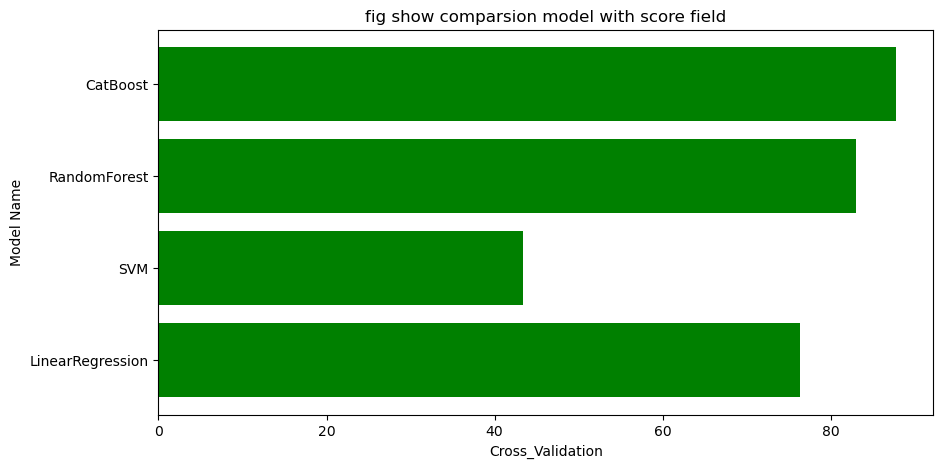

In [32]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(comparingDF['Model_Name'], comparingDF['Cross_Validation'], color ='green')
 
plt.ylabel("Model Name")
plt.xlabel("Cross_Validation")
plt.title("fig show comparsion model with score field")
plt.show()

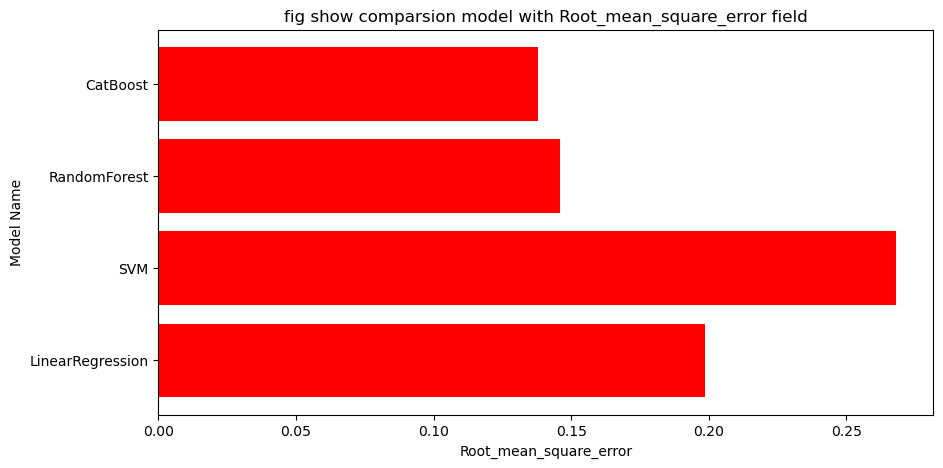

In [33]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(comparingDF['Model_Name'], comparingDF['Root_mean_square_error'], color ='red')
 
plt.ylabel("Model Name")
plt.xlabel("Root_mean_square_error")
plt.title("fig show comparsion model with Root_mean_square_error field")
plt.show()

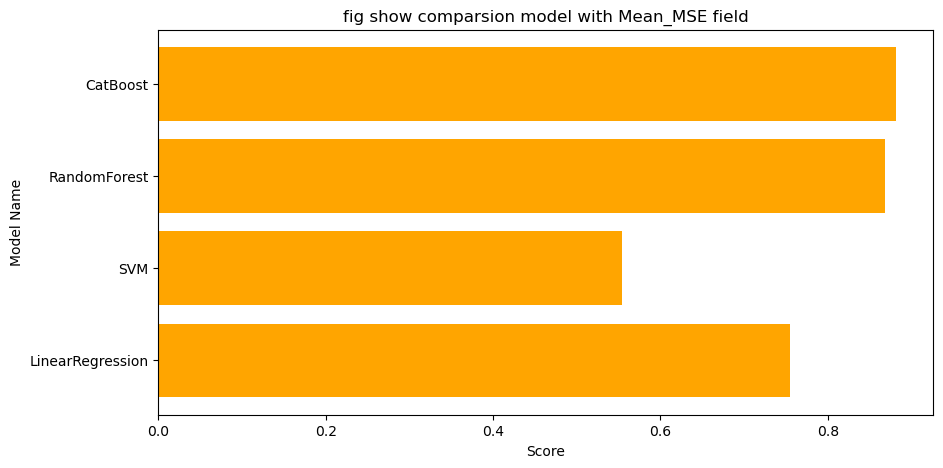

In [35]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(comparingDF['Model_Name'], comparingDF['Score'], color ='orange')
 
plt.ylabel("Model Name")
plt.xlabel("Score")
plt.title("fig show comparsion model with Mean_MSE field")
plt.show()

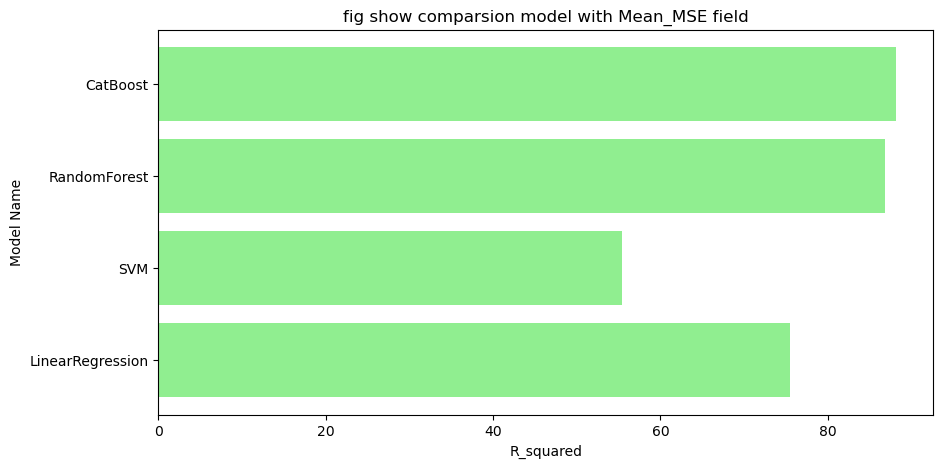

In [36]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.barh(comparingDF['Model_Name'], comparingDF['R_squared'], color ='Lightgreen')
 
plt.ylabel("Model Name")
plt.xlabel("R_squared")
plt.title("fig show comparsion model with Mean_MSE field")
plt.show()